## Scaling data
- Scaling data is necessary to convert values in a manner which would optimise the ML algorithms which run on them.
- There are two ways we scale data: Normalization and Standardization
- Scaling is useful in situations where we do not want one feature to dominate others.

### Normalization

##### MixMaxScaler

- MixMaxScaler would scale every column's (by default) values down to a range between 0 and 1 using the below formula

`x' = (x - min(x)) / max(x) - min(x)`

- This scales the values based on their propotions to the minimun and maximum values in the dataset.

    x    y
0   1   10
1   2   20
2   3   30
3   4   40
4   5   50
5   6   60
6   7   70
7   8   80
8   9   90
9  10  100
[[0.         0.        ]
 [0.11111111 0.11111111]
 [0.22222222 0.22222222]
 [0.33333333 0.33333333]
 [0.44444444 0.44444444]
 [0.55555556 0.55555556]
 [0.66666667 0.66666667]
 [0.77777778 0.77777778]
 [0.88888889 0.88888889]
 [1.         1.        ]]


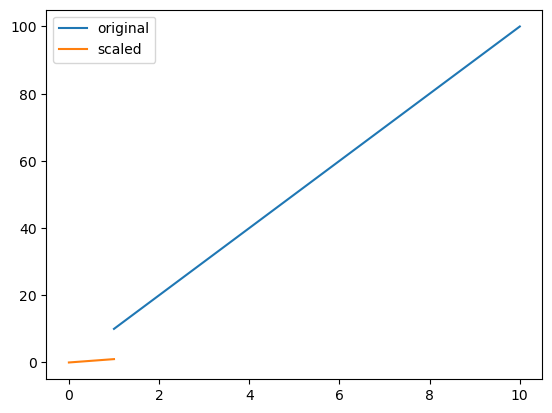

In [68]:
# sklearn minmaxscaler demo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# create a dataframe
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'y': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})
print(df)

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the dataframe
scaler.fit(df)

# transform the dataframe
scaled_df = scaler.transform(df)
print(scaled_df)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_df, columns=['x', 'y'])
df_scaled

# plot the original and scaled data
plt.plot(df['x'], df['y'], label='original')
plt.plot(df_scaled['x'], df_scaled['y'], label='scaled')
plt.legend()
plt.show()

### Standardisation
- Standardisation is done to keep the mean of the data at 0 and keep the standard deviation at 1.
- It is also known as Z-score normalisation.
- The result would be values with the properties of standard normal distribution.

##### Formula:
`z = (x-x') / σ`

`x = the data point to be scaled.`

`x' = the average of the feature`

`σ = standard deviation of the feature`

`z = scaled value`



              x           y
count  10.00000   10.000000
mean    5.50000   55.000000
std     3.02765   30.276504
min     1.00000   10.000000
25%     3.25000   32.500000
50%     5.50000   55.000000
75%     7.75000   77.500000
max    10.00000  100.000000
        x   y
count  10  10
mean    0   0
std     1   1
min    -1  -1
25%     0   0
50%     0   0
75%     0   0
max     1   1


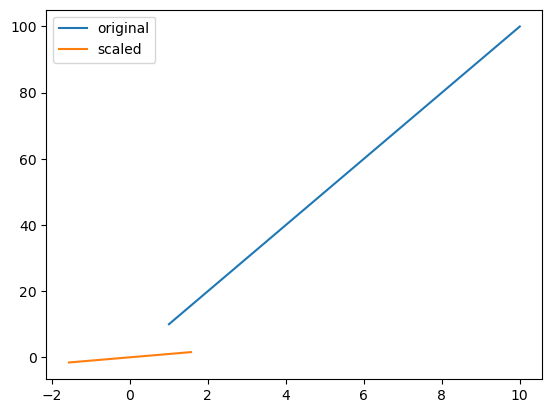

In [69]:
# sklearn standard scaler demo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# create a dataframe
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'y': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})

print(df.describe())

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataframe
scaled_df = scaler.fit_transform(df)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_df, columns=['x', 'y'])

# print the scaled data statistics
print(df_scaled.describe().astype(int).round(2))

# plot the original and scaled data
plt.plot(df['x'], df['y'], label='original')
plt.plot(df_scaled['x'], df_scaled['y'], label='scaled')
plt.legend()
plt.show()

## Outliers
- Outliers are data points that are significantly away from other data points in a given feature.
- So far both methods we have seen are susciptible to being skewed by outliers.
- As we saw in the "descriptie stats" post, we can get the median instead of the mean as it is less susciptible to significant movement.
- We can also use IQR or Mode, both of which are even less susciptible.
- These are just options and what we choose depends on the dataset that is available.
- The scikit RobustScaler can help us scale our data better when we have outliers.

     x     y
0    1    10
1    2    20
2    3    30
3    4    40
4    5    50
5    6    60
6    7    70
7    8    80
8    9  9000
9  100   100
           x           y
0  -1.000000   -1.000000
1  -0.777778   -0.777778
2  -0.555556   -0.555556
3  -0.333333   -0.333333
4  -0.111111   -0.111111
5   0.111111    0.111111
6   0.333333    0.333333
7   0.555556    0.555556
8   0.777778  198.777778
9  21.000000    1.000000


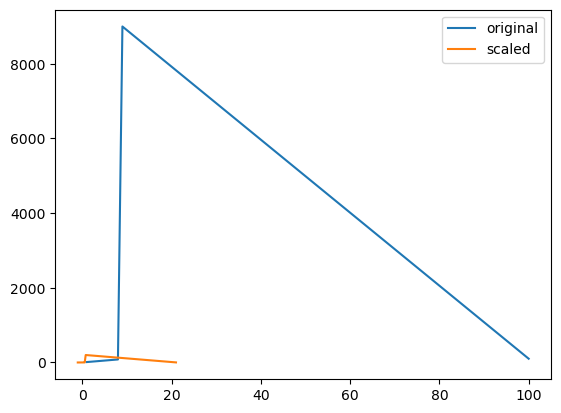

In [70]:
# robust scaler demo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# create a dataframe
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 100],
                        'y': [10, 20, 30, 40, 50, 60, 70, 80, 9000, 100]})
print(df)

# create a RobustScaler object
scaler = RobustScaler()

# fit the scaler to the dataframe
scaled_df = scaler.fit_transform(df)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_df, columns=['x', 'y'])

# print the scaled data
print(df_scaled)

# plot the original and scaled data
plt.plot(df['x'], df['y'], label='original')
plt.plot(df_scaled['x'], df_scaled['y'], label='scaled')
plt.legend()
plt.show()

## L1 and L2 Normalisation
- L1 normalisation is when we scale down the data in a way so that the absolute sum of the values is 1.
- Formula for L1 normalisation is : x' = x / sum(x)
- L1 normalisation helps us focus on more important features and helps suppress irrelevant or 'weak' observations.
- The outliers however have an adverse impact of L1 normalisation since they may suppress relevant data.
- L2 normalisation helps us here since we scale the features using the square root of the sum of squares.
- Formula for L2 normalisation is : x' = x / square_root(sum(x^2))
- L1 normalization encourages sparse feature selection, while L2 normalization helps to prevent overfitting. The choice of which normalization technique to use depends on the specific characteristics of the dataset and the machine learning task at hand.

## L2 scaling using scikit Normalizer
- The normalizer from sklearn normalizes by row by default (axis = 1)
- This means that if you pass a 1D array to the Normalizer function, it will be treated as a row of a matrix and each element in the row will be divided by the L2 norm of the row. Therefore, the output of calculate_l2_norm_sklearn will be a normalized value that is between 0 and 1.
- We can see this happening in the demo below.

In [71]:
import math
import numpy as np
from sklearn.preprocessing import Normalizer


def calculate_l2_norm(data):
    arr = np.array(data)
    l2_norm = np.linalg.norm(arr, ord=2)
    return [x/l2_norm for x in data]



def calculate_l2_norm_formula(data):
    # Calculate the sum of the squares of the list elements
    squares_sum = sum(x**2 for x in data)

    # Calculate the square root of the sum of the squares
    l2_norm = math.sqrt(squares_sum)

    return [x/l2_norm for x in data]

# sklearn normalizer needs a 2D array as input
# so we need to reshape the input array
# and then transform it back to a 1D array
# l2 norm is calculated for each row
def calculate_l2_norm_sklearn(data):
    arr = np.array(data).reshape(1,-1)
    normalizer = Normalizer(norm='l2')
    arr_normalized = normalizer.fit_transform(arr)
    
    return arr_normalized

data = [1,2,3,4,5,6,7,8,9,10]
print(calculate_l2_norm_formula(data), '\n')
print(calculate_l2_norm(data), '\n')
print(calculate_l2_norm_sklearn(data), '\n')


[0.050964719143762556, 0.10192943828752511, 0.15289415743128767, 0.20385887657505022, 0.2548235957188128, 0.30578831486257535, 0.3567530340063379, 0.40771775315010045, 0.458682472293863, 0.5096471914376256] 

[0.050964719143762556, 0.10192943828752511, 0.15289415743128767, 0.20385887657505022, 0.2548235957188128, 0.30578831486257535, 0.3567530340063379, 0.40771775315010045, 0.458682472293863, 0.5096471914376256] 

[[0.05096472 0.10192944 0.15289416 0.20385888 0.2548236  0.30578831
  0.35675303 0.40771775 0.45868247 0.50964719]] 



## Normalizer demo
- Here we can see data being normalised for every observation instead of the features

In [72]:
# normalizer demo
import pandas as pd
from sklearn.preprocessing import Normalizer

# create a dataframe
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'y': [10, 22, 30, 40, 50, 60, 70, 80, 90, 100]})
print(df)

# create a Normalizer object
normalizer = Normalizer(norm='l2')

# fit the scaler to the dataframe
scaled_df = normalizer.fit_transform(df)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_df, columns=['x', 'y'])

# print the scaled data
print(df_scaled)


    x    y
0   1   10
1   2   22
2   3   30
3   4   40
4   5   50
5   6   60
6   7   70
7   8   80
8   9   90
9  10  100
          x         y
0  0.099504  0.995037
1  0.090536  0.995893
2  0.099504  0.995037
3  0.099504  0.995037
4  0.099504  0.995037
5  0.099504  0.995037
6  0.099504  0.995037
7  0.099504  0.995037
8  0.099504  0.995037
9  0.099504  0.995037
